In [2]:
import sys
sys.path.append('../')
import importlib

import numpy as np
import torch

import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
import seaborn as sbn
from contextlib import redirect_stdout
import json
import ast

import UsefullFunctions as ufn

In [3]:
importlib.reload(ufn)

trials = 1000

ufn.frates_labels(trials)

iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000


In [67]:
with open('frates_labels.json', 'r') as json_file:
    data = json.load(json_file)

frates_actor = np.array(data["frates_actor"])
frates_critic = np.array(data["frates_critic"])
final_actions = np.array(data["final_actions"])
right_values = np.array(data["right_values"])
left_values = np.array(data["left_values"])
global_values = np.array(data["global_values"])
stimuli = np.array(data["stimuli"])

In [68]:
#net = {"X" : frates_actor, "network" : "actor"}
net = {"X" : frates_critic, "network" : "critic"}

#label = {"Y" : final_actions, "label" : "actions"}
#label = {"Y" : right_values, "label" : "right_values"}
#label = {"Y" : left_values, "label" : "left_values"}
label = {"Y" : global_values, "label" : "global_values"}

#model = {"model" : 'perceptron', "param" : 0}
model = {"model" : 'perceptronL1', "param" : 0.01}
#model = {"model" : 'svm', "param" : 0.001}

average over 10 epochs of test scores: 0.964
average over 10 epochs of test random scores: 0.497
average over 10 epochs of test scores: 0.880
average over 10 epochs of test random scores: 0.485
average over 10 epochs of test scores: 0.804
average over 10 epochs of test random scores: 0.502
average over 10 epochs of test scores: 0.741
average over 10 epochs of test random scores: 0.511
average over 10 epochs of test scores: 0.678
average over 10 epochs of test random scores: 0.504
----------
training score: 0.791
test score: 0.725 
----------


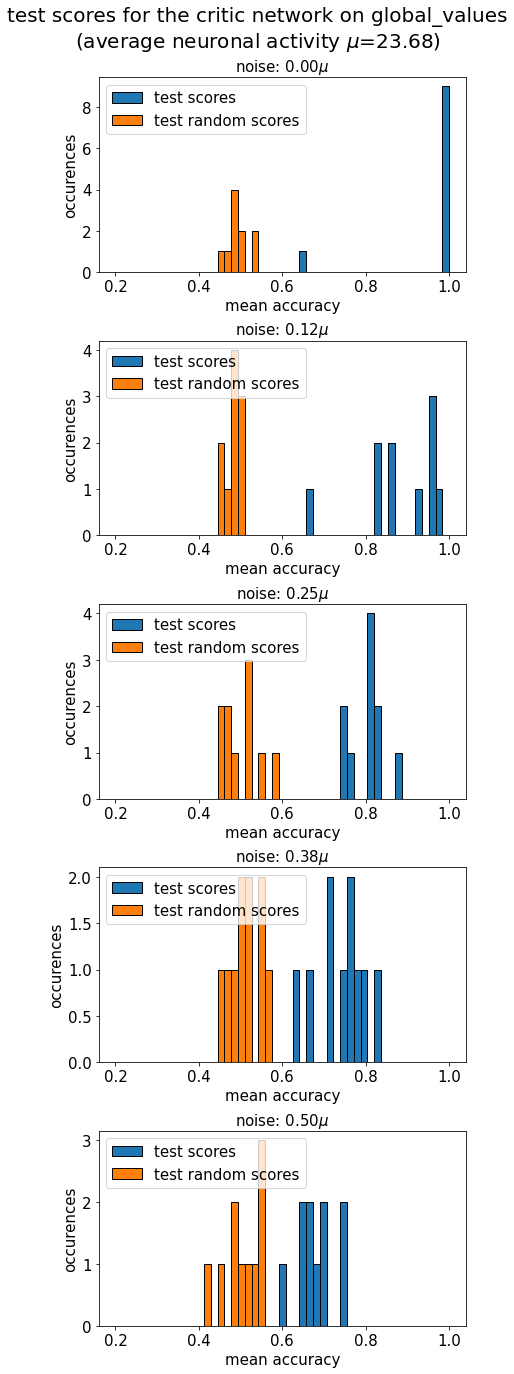

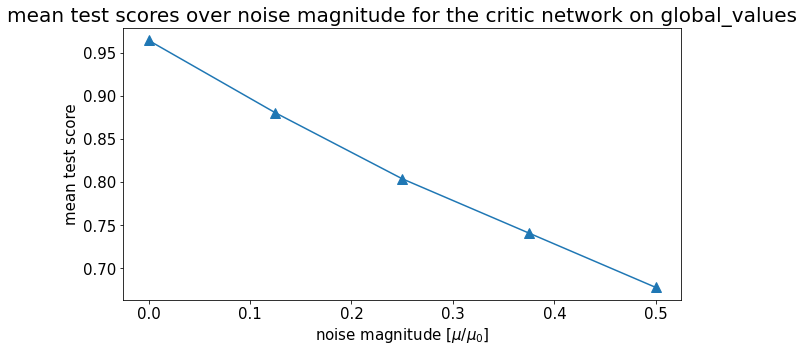

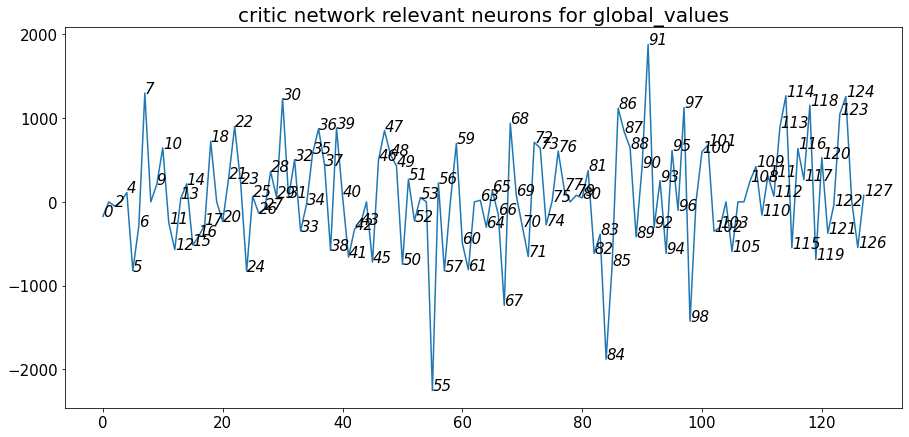

In [71]:
importlib.reload(ufn)

noise_mag = np.array([0, 2/16, 4/16, 6/16, 8/16])

ufn.rel_nurons(X=net["X"], Y=label["Y"], model=model["model"], C=model["param"],\
               network=net["network"], label=label["label"], noise_mag=noise_mag)

In [54]:
if net["network"] == "actor":
    with open("clf_data/"+label["label"]+"/relevant_neurons_actor.txt", 'r') as file:
        file_content = file.read()
else:
    with open("clf_data/"+label["label"]+"/relevant_neurons_critic.txt", 'r') as file:
        file_content = file.read()

parsed_content = ast.literal_eval(file_content)
relevant_neurons = np.asarray(parsed_content)
print(relevant_neurons)

check = True
random_neurons = np.zeros(len(relevant_neurons))
while check is True:
    random_neurons = np.random.randint(0, 128, 10)
    bool_array = np.isin(random_neurons, relevant_neurons)
    check = any(bool_array)
print(random_neurons)

[ 8 97 47 71  7 82 91 98 16 67]
[ 96  12 124   4 112   9  68  14  70  88]


In [ ]:
importlib.reload(ufn)

ufn.tuning_curves(relevant_neurons, net["X"], stimuli, net["network"], label["label"])

In [ ]:
importlib.reload(ufn)

ufn.tuning_curves(random_neurons, net["X"], stimuli, net["network"], label["label"]+"_random")

In [22]:
importlib.reload(ufn)

ufn.neurons_population(net["X"], label["Y"], net["network"], label["label"])

In [4]:
import json
import numpy as np
with open('neurons_population.json', 'r') as json_file:
    data = json.load(json_file)

averages = np.array(data["averages"])
stds = np.array(data["stds"])
dcs = np.array(data["dcs"])

In [5]:
averages

array([[1.00025660e+01, 1.80389292e+01],
       [0.00000000e+00, 0.00000000e+00],
       [3.61812560e+01, 5.35109477e+01],
       [2.92673436e+01, 4.28335372e+01],
       [0.00000000e+00, 0.00000000e+00],
       [7.74284245e+01, 7.52068941e+01],
       [0.00000000e+00, 0.00000000e+00],
       [3.00222104e+01, 4.33465891e+01],
       [0.00000000e+00, 0.00000000e+00],
       [2.63625610e+00, 4.61509736e-01],
       [2.01448057e+01, 1.63868709e+01],
       [0.00000000e+00, 0.00000000e+00],
       [4.72489235e+01, 5.54343454e+01],
       [2.47120666e+01, 2.27700538e+01],
       [0.00000000e+00, 0.00000000e+00],
       [5.56016451e+01, 5.98921176e+01],
       [6.38078622e+01, 6.60652304e+01],
       [0.00000000e+00, 0.00000000e+00],
       [5.19507386e+00, 1.11012083e+01],
       [2.94009119e+00, 7.63017178e+00],
       [0.00000000e+00, 0.00000000e+00],
       [5.14308354e+01, 5.32159864e+01],
       [5.13286837e+01, 5.50978559e+01],
       [1.67205675e-01, 1.09276095e-01],
       [4.769672